In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


import seaborn as sns



import plotly.graph_objs as go 
from plotly.offline import plot

import plotly.graph_objects as go


In [2]:
dff = pd.read_csv('dataframe_limpio.csv')


In [3]:
dff.head()


,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,video_error_or_removed,description,state,lat,lon,geometry,views_reescaled,likes_reescaled,dislikes_reescaled,comment_count_reescaled
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922),0.000748,0.005753,0.000297,0.001595
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,...,False,"One year after the presidential election, John...",Nevada,39.876019,-117.224121,POINT (-117.224121 39.876019),0.002419,0.009718,0.000615,0.001270
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,...,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Delaware,39.000000,-75.500000,POINT (-75.5 39),0.003191,0.014603,0.000534,0.000818
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,...,False,Today we find out if Link is a Nickelback amat...,Delaware,39.000000,-75.500000,POINT (-75.5 39),0.000343,0.001017,0.000067,0.000215
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,...,False,I know it's been a while since we did this sho...,Michigan,44.182205,-84.506836,POINT (-84.50683600000001 44.182205),0.002096,0.013223,0.000199,0.001752


In [253]:
#pregunta 7

# Agrupamos los datos por estado y sumamos las vistas, me gusta y no me gusta
df_estados = dff.groupby('state').agg({
    'views': 'sum',
    'likes': 'sum',
    'dislikes': 'sum'
}).reset_index()

# Encuentramos el estado con el mayor número de vistas
estado_mas_vistas = df_estados.loc[df_estados['views'].idxmax()]

# Encuentramos el estado con el mayor número de me gusta
estado_mas_likes = df_estados.loc[df_estados['likes'].idxmax()]

# Encuentramos el estado con el mayor número de no me gusta
estado_mas_dislikes = df_estados.loc[df_estados['dislikes'].idxmax()]

print("Estado con el mayor número de vistas:")
print(estado_mas_vistas[['state', 'views']])
print("\nEstado con el mayor número de me gusta:")
print(estado_mas_likes[['state', 'likes']])
print("\nEstado con el mayor número de no me gusta:")
print(estado_mas_dislikes[['state', 'dislikes']])


Estado con el mayor número de vistas:
state    North Carolina
views        2426689616
Name: 32, dtype: object

Estado con el mayor número de me gusta:
state    North Carolina
likes          76479796
Name: 32, dtype: object

Estado con el mayor número de no me gusta:
state         Idaho
dislikes    5764628
Name: 11, dtype: object


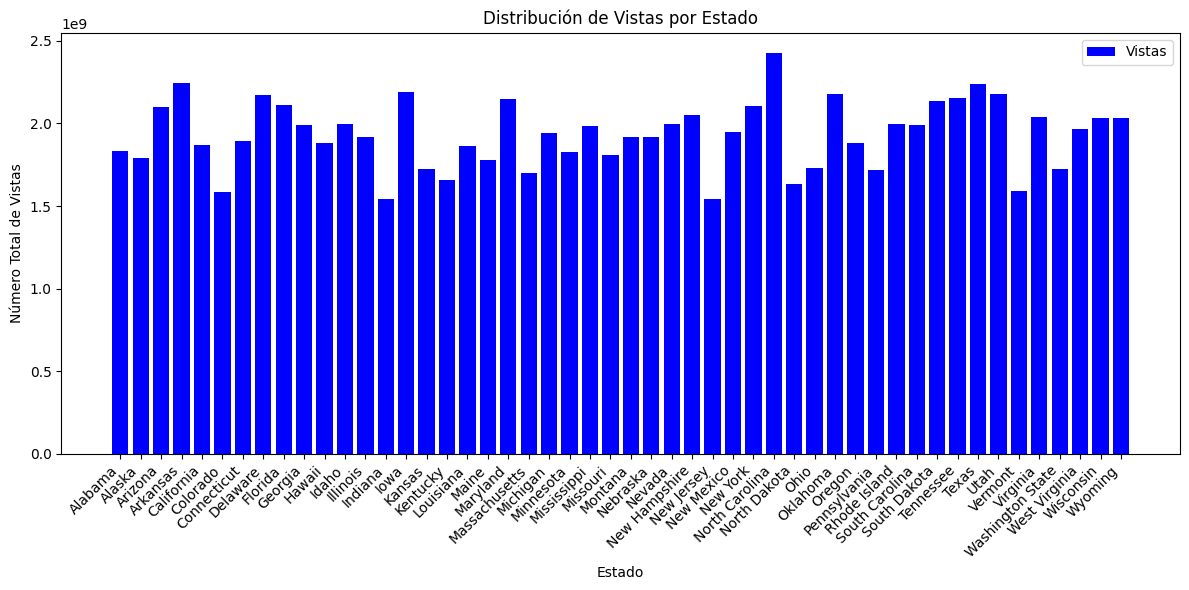

In [254]:
# Agrupamos los datos por estado y suma las vistas
df_views = dff.groupby('state')['views'].sum().reset_index()

# Visualización con matplotlib
plt.figure(figsize=(12, 6))

# Realizamos la Barra para el número total de vistas por estado
plt.bar(df_views['state'], df_views['views'], color='blue', label='Vistas')

plt.title('Distribución de Vistas por Estado')
plt.xlabel('Estado')
plt.ylabel('Número Total de Vistas')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


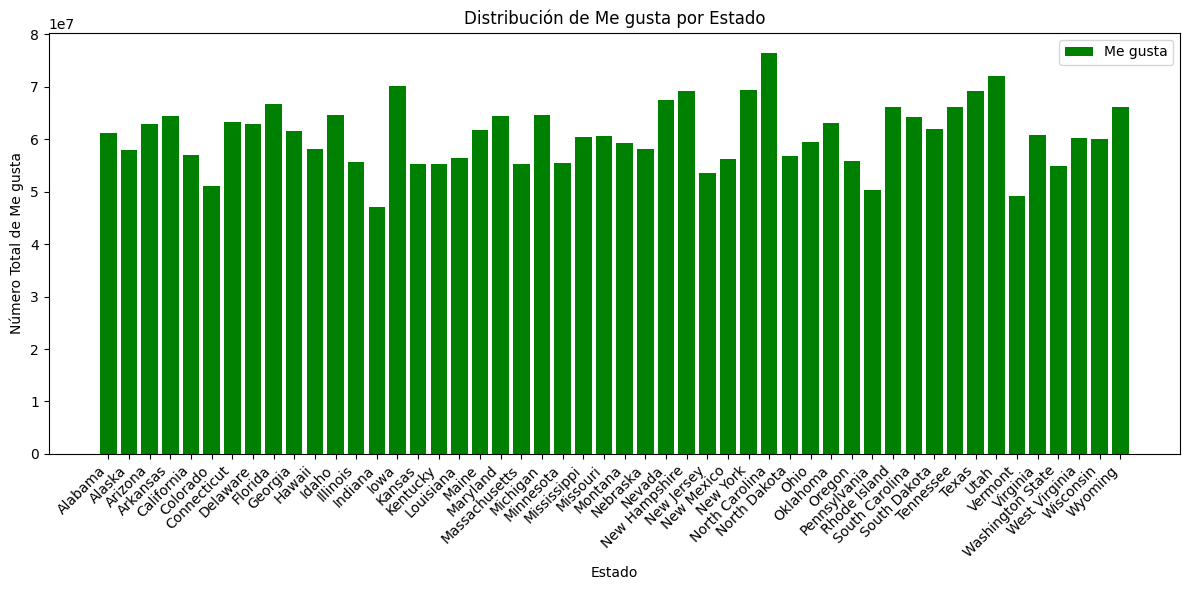

In [255]:
# Agrupamos los datos por estado y suma los likes
df_likes = dff.groupby('state')['likes'].sum().reset_index()

# Visualización con matplotlib
plt.figure(figsize=(12, 6))

# Realizamos la Barra para el número total de me gusta por estado
plt.bar(df_likes['state'], df_likes['likes'], color='green', label='Me gusta')

plt.title('Distribución de Me gusta por Estado')
plt.xlabel('Estado')
plt.ylabel('Número Total de Me gusta')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

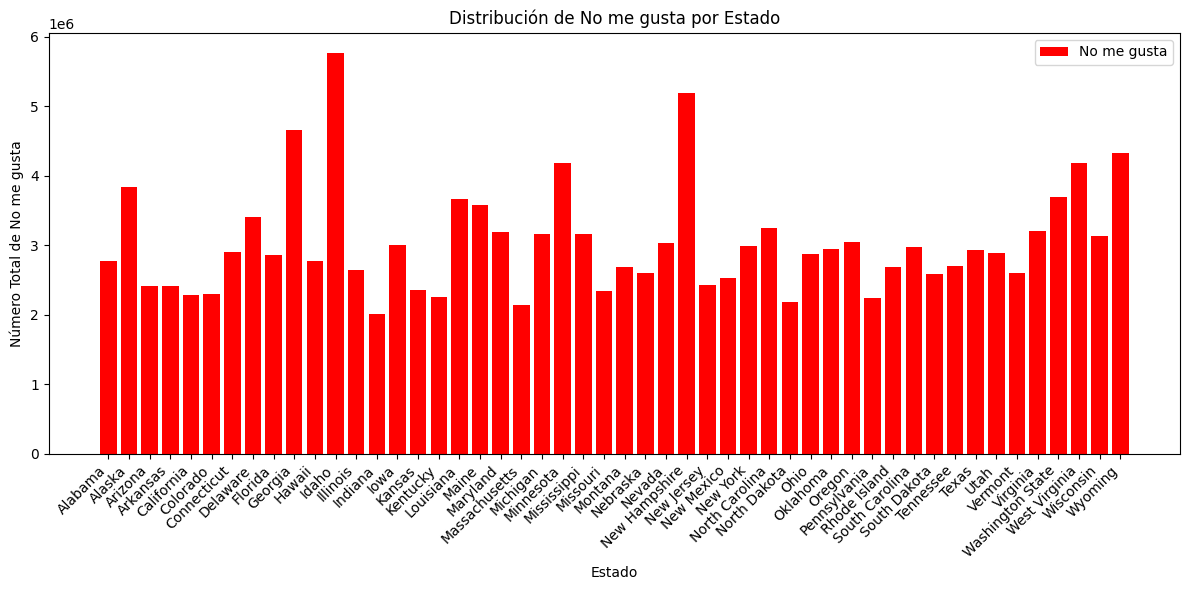

In [256]:
df_dislikes = dff.groupby('state')['dislikes'].sum().reset_index()

# Visualización con matplotlib
plt.figure(figsize=(12, 6))

# Realizamos la Barra para el número total de no me gusta por estado
plt.bar(df_dislikes['state'], df_dislikes['dislikes'], color='red', label='No me gusta')

plt.title('Distribución de No me gusta por Estado')
plt.xlabel('Estado')
plt.ylabel('Número Total de No me gusta')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Ecuación de la recta: y = 27.301 x + 325988.094
Coeficiente de correlación: 0.864
Coeficiente de determinación: 0.746


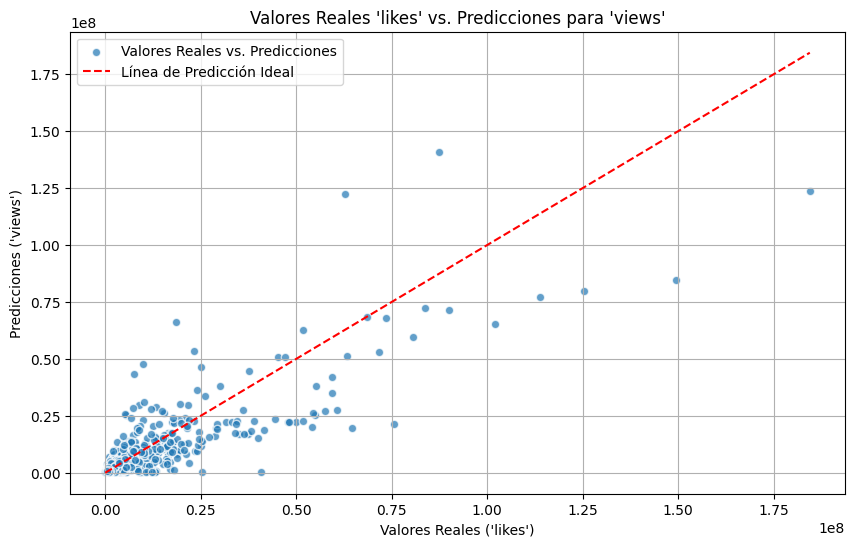

In [257]:
#pregunta 8
# Seleccionamos las variables 
variable_x = 'likes'
variable_y = 'views'

# Dividiremos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dff[[variable_x]], dff[variable_y], test_size=0.1, random_state=50)

# Crearemos un modelo de regresión lineal
modelo = LinearRegression()

# Entrenaremos el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realizaremos las predicciones en el conjunto de prueba usando el modelo
y_pred = modelo.predict(X_test)

# Generamos el análisis
print('Ecuación de la recta: y =', round(modelo.coef_[0], 3), 'x +', round(modelo.intercept_, 3))  # obtenemos la ecuación de la recta
print('Coeficiente de correlación:', round(np.corrcoef(X_test[variable_x], y_test)[0, 1], 3))  # obtenemos el coeficiente de correlación
print('Coeficiente de determinación:', round(r2_score(y_test, y_pred), 3))  # obtenemos el coeficiente de determinación

# Obtendremos la gráfica con intervalo de confianza
plt.figure(figsize=(10, 6))

# Scatter plot de valores reales vs. predicciones
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', label='Valores Reales vs. Predicciones')

# Línea de predicción ideal (Valores Reales = Predicciones)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de Predicción Ideal')

plt.xlabel("Valores Reales ('likes')")
plt.ylabel("Predicciones ('views')")
plt.title("Valores Reales 'likes' vs. Predicciones para 'views'")
plt.legend()
plt.grid(True)
plt.show()


In [258]:
dato_predictor = 76479796

# Crearemos un DataFrame con el dato_predictor
likes_prediccion = pd.DataFrame([dato_predictor], columns=[variable_x])

# Realizaremos la predicción
vistas_prediccion = modelo.predict(likes_prediccion)

# Imprimimos la predicción
print('para una cantidad de: ', dato_predictor, 'likes, obtenemos una cantidad de vistas que es de:', round(vistas_prediccion[0], 2),' aproximadamente.')

para una cantidad de:  76479796 likes, obtenemos una cantidad de vistas que es de: 2088312017.69  aproximadamente.


Ecuación de la recta: y = 0.026 x + 12336.315
Coeficiente de correlación: 0.864
Coeficiente de determinación: 0.747


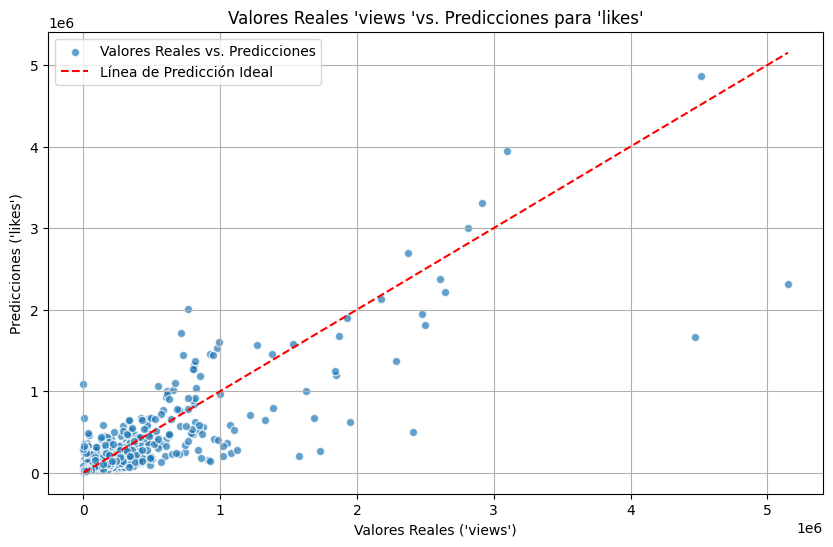

In [259]:
# Seleccionamos las variables 
variable_x = 'views'
variable_y = 'likes'

# Dividiremos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dff[[variable_x]], dff[variable_y], test_size=0.1, random_state=50)

# Crearemos un modelo de regresión lineal
modelo = LinearRegression()

# Entrenaremos el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realizaremos las predicciones en el conjunto de prueba usando el modelo
y_pred = modelo.predict(X_test)

# Generamos el análisis
print('Ecuación de la recta: y =', round(modelo.coef_[0], 3), 'x +', round(modelo.intercept_, 3))  # obtenemos la ecuación de la recta
print('Coeficiente de correlación:', round(np.corrcoef(X_test[variable_x], y_test)[0, 1], 3))  # obtenemos el coeficiente de correlación
print('Coeficiente de determinación:', round(r2_score(y_test, y_pred), 3))  # obtenemos el coeficiente de determinación

# Obtendremos la gráfica con intervalo de confianza
plt.figure(figsize=(10, 6))

# Scatter plot de valores reales vs. predicciones
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', label='Valores Reales vs. Predicciones')

# Línea de predicción ideal (Valores Reales = Predicciones)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de Predicción Ideal')

plt.xlabel("Valores Reales ('views')")
plt.ylabel("Predicciones ('likes')")
plt.title("Valores Reales 'views 'vs. Predicciones para 'likes'")
plt.legend()
plt.grid(True)
plt.show()

In [264]:
dato_predictor = 76479796

# Crearemos un DataFrame con el dato_predictor
vistas_prediccion = pd.DataFrame([dato_predictor], columns=[variable_x])

# Realizaremos la predicción
likes_prediccion = modelo.predict(vistas_prediccion)

# Imprimimos la predicción
print('Para una cantidad de ', dato_predictor, 'vistas, obtenemos una cantidad de likes que es de:', round(likes_prediccion[0], 2,),' aproximadamente.')

Para una cantidad de  76479796 vistas, obtenemos una cantidad de likes que es de: 2023388.43  aproximadamente.


Ecuación de la recta: y = 0.052 x + -240.872
Coeficiente de correlación: 0.51
Coeficiente de determinación: 0.206


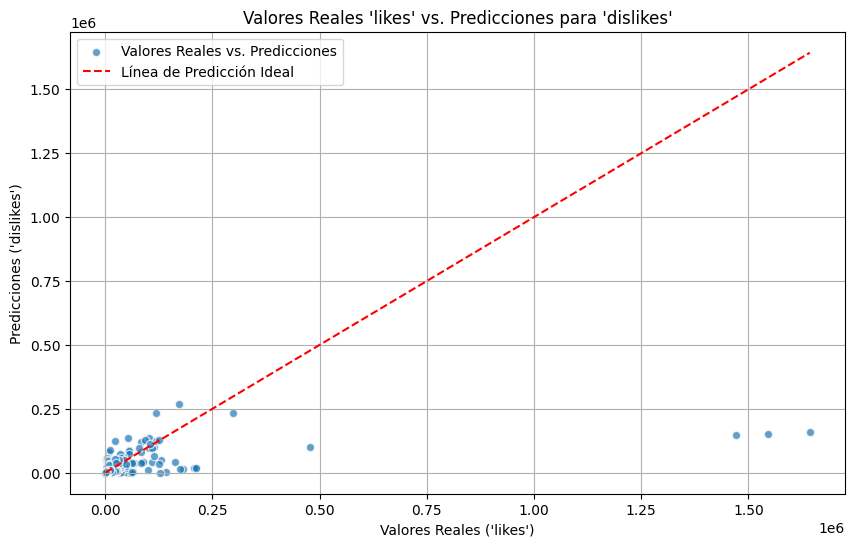

In [181]:
# Seleccionamos las variables 
variable_x = 'likes'
variable_y = 'dislikes'

# Dividiremos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dff[[variable_x]], dff[variable_y], test_size=0.1, random_state=50)

# Crearemos un modelo de regresión lineal
modelo = LinearRegression()

# Entrenaremos el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realizaremos las predicciones en el conjunto de prueba usando el modelo
y_pred = modelo.predict(X_test)

# Generamos el análisis
print('Ecuación de la recta: y =', round(modelo.coef_[0], 3), 'x +', round(modelo.intercept_, 3))  # obtenemos la ecuación de la recta
print('Coeficiente de correlación:', round(np.corrcoef(X_test[variable_x], y_test)[0, 1], 3))  # obtenemos el coeficiente de correlación
print('Coeficiente de determinación:', round(r2_score(y_test, y_pred), 3))  # obtenemos el coeficiente de determinación

# Obtendremos la gráfica con intervalo de confianza
plt.figure(figsize=(10, 6))

# Scatter plot de valores reales vs. predicciones
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', label='Valores Reales vs. Predicciones')

# Línea de predicción ideal (Valores Reales = Predicciones)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de Predicción Ideal')

plt.xlabel("Valores Reales ('likes')")
plt.ylabel("Predicciones ('dislikes')")
plt.title("Valores Reales 'likes' vs. Predicciones para 'dislikes'")
plt.legend()
plt.grid(True)
plt.show()

In [158]:
dato_predictor = 2088312017

# Crearemos un DataFrame con el dato_predictor
likes_prediccion = pd.DataFrame([dato_predictor], columns=[variable_x])

# Realizaremos la predicción
dislikes_prediccion = modelo.predict(likes_prediccion)

# Imprimimos la predicción
print('Para una cantidad de', dato_predictor, 'likes, obtenemos una cantidad de dislikes que es de:', round(dislikes_prediccion[0], 2),' aproximadamente.')

Para una cantidad de 2088312017 likes, obtenemos una cantidad de dislikes que es de: 108630763.1  aproximadamente.


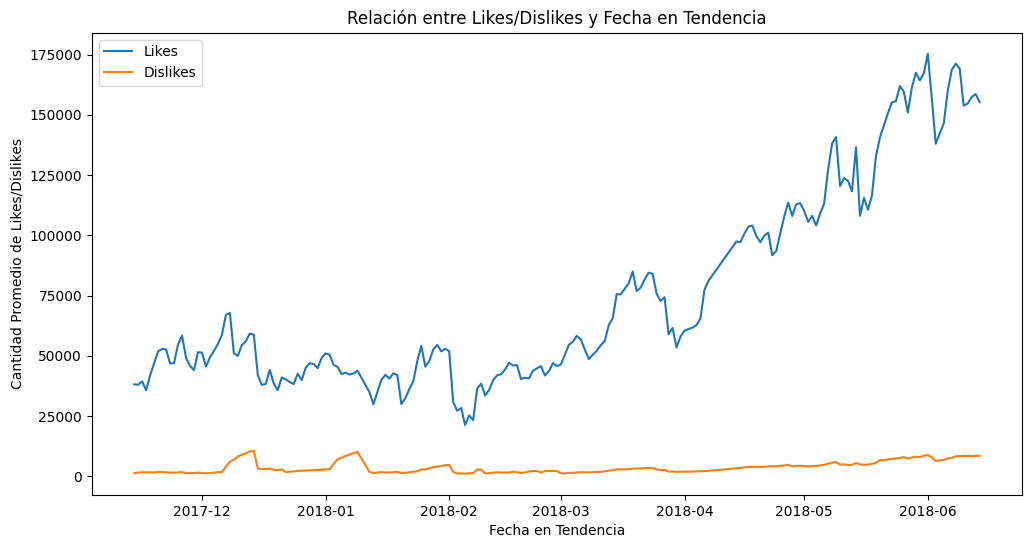

In [261]:
#pregunta 9



# Crearemos una variable auxiliar para la fecha en tendencia
dff['fecha_tendencia'] = dff['trending_date']

# Convertimos la columna 'trending_date' a formato de fecha
dff['fecha_tendencia'] = pd.to_datetime(dff['trending_date'], format='%y.%d.%m')


# Agrupamos por la variable auxiliar y calculamos la media de likes y dislikes
mean_likes_by_date = dff.groupby('fecha_tendencia')['likes'].mean()
mean_dislikes_by_date = dff.groupby('fecha_tendencia')['dislikes'].mean()

# Graficamos
plt.figure(figsize=(12, 6))
sns.lineplot(x=mean_likes_by_date.index, y=mean_likes_by_date.values, label='Likes')
sns.lineplot(x=mean_dislikes_by_date.index, y=mean_dislikes_by_date.values, label='Dislikes')
plt.xlabel('Fecha en Tendencia')
plt.ylabel('Cantidad Promedio de Likes/Dislikes')
plt.title('Relación entre Likes/Dislikes y Fecha en Tendencia')
plt.legend()
plt.show()